# IMDb project - Lennart & Thomas

(If you want to run the code included in the notebook below, please make sure that you have downloaded the proper .pickle files and put them in the same directory as your project.)

# Motivation
## What is your dataset?
Our dataset is mainly based on a dataset from [kaggle.com](https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset), which contains ~5000 movies with attributes such as title, director, duration, budget, gross and more. However this dataset is not fulfilling in respect to cast members of each movie, so we installed a Python package called [IMDbPY](http://imdbpy.sourceforge.net/). IMDbPY lets us input a movie title, query the IMDb online database and gain access to a lot of extra attributes - including a satisfying cast list for each movie. 

Other than a Kaggle set and IMDbPY, we have also download a bunch of manuscripts, for text analysis, from imsdb.com and springfieldspringfield.co.uk. In total we managed to parse about 1200 scripts from the websites.

## Why did you choose this/these particular dataset(s)?
Our initial idea, as we mentioned in our Project Assignment A video, was to gather all the movie information from Wikipedia in similar style to the Philosopher Network. We had downloaded quite a bit of data before we ran into trouble with getting cast, budget, gross and other data that might not be listed in the same way for each WikiPage.

Then we stubled upon the dataset from Kaggle. It had all the information we needed for the project and was available in clean, well almost, clean .csv files. We then found IMDbPY and it was a perfect fit for getting even more attributes for each movie.

For manuscripts imsdb.com and springfieldspringfield.co.uk had the most comprehensive databse of manuscripts. Unfortunately they are not offering the scripts as download, so here we used our skills from the class to parse the HTML using BeautifulSoup and save the manuscripts locally using Pickle. 

## What was your goal for the end user's experience?
Our end goal is to present the user with some information:
* Regarding the different aspects of making a successful movie by looking at different parameters that makes a successful movie.
* On how characteristics of how movies are connected by their actors and to discover patterns in this network.


# Basic stats. Let's understand the dataset better
## Write about your choices in data cleaning and preprocessing
### Movie data
We chose to download a dataset from kaggle which was ordered in different columns contained in a csv file. We used the panda library to read the csv files and it provides an easy use of the information contained in the csv file. The dataset was missing meaningful information about the cast of each movie, as it had only three actors for each movie, and sometimes the main characters of the movie was not there. So to obtain this information we used the IMDbPy to request the cast for each movie and then replaced the actors originally in the dataset with this set of actors. Combining the two in a dict we had all the information needed to begin analyzing the movies.
To remove some unicode problems we had to replace two special unicode characters from each title using (.replace) with the empty string, as every title ended with this. This was necessary as we had to combine two datasets and the movies titles would not match otherwise.

### Scripts
We used the BeautifulSoup library to download and parse text from an html source of the websites. This allows for us to search for a specific keyword/tag and download everything contained in this tag. So we checked to source code for the html pages we wanted to download the scripts from and found where the text was located and could then download it. 

Afterwards we did some cleanup of the scripts. We converted each script to a string for which we first removed all tags using a regular expression and then deleted newline symbols, question marks, commas etc.  
As we wanted to analyze only the words from the scripts we used another regular expression to remove anything not being a word. Then we tokenized the text using nltks regular expression tokenizer with the regular expression removing anything but words. 
We imported stopwords and added a few extra ourselves and then for each token we converted it to lowercase and if not a stopword and more than two letters we added it. We chose to remove words at length less than three as many of them were not real words but a result of the tokenizer splitting the words incorrectly. 

### Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)

As previously mentioned we used a dataset with a lot of attributes. At first glance it seemed a perfect fit for our project, but as we started analysing the data we found some problems with the set. For example the gross of each movie, which is just labeled 'gross' in the csv file, is the domestic gross of the movie, not the international. The budget numbers were faulty as well .. the information describing the set specified that the budgets were declared in american dollars, USD. However some movies, for example from South Korea, were specified in Korean currency which meant that it looked like a couple of movies costed \$4 billion to produce which is so far from the average that it didn't make sense.

We mentioned before that we weren't satisfied with the cast members of the set. There is only 3 actors per movie in the set and those in the set were included based on their facebook likes, which did leave some prominent actors out. So to work around this we used IMDbPY as explained before.

# Theory. Which theoretical tools did you use?

## Describe which network science tools and data analysis strategies you've used, how those network science measures work, and why the tools you've chosen are right for the problem you're solving.

We mostly used community detection on our network of movies. This way we could tell if certain genres shared the same actors, but we will explain this further in the section 'Tools and analysis' below.
We also analyzed the centrality of nodes in the network to see whether this has any correlation with the rating of a movie.

## Talk about how you've worked with text, including regular expressions, unicode, etc.

We mostly used regular expressions to clean the data we had downloaded by removing tags in the scripts which were being downloaded as plain HTML pages. We didn't use unicode that much. By using the kaggle set we got mostly clean data, so there was no need.

## Tools and analysis:

## Graph representation & Genre Communities
**The idea:**

As the movies form a network we want to see how they are connected inside this network by visualizing it. Specifically we want to see how communities in this network look like, and also see if it has any relation to the movie genres. We want to compare the movie genres with the communities and see whether the movie genres are communities. 

**The tool**

We use the Louvain algorithm for community detection in a graph. This automatically finds the best partition of the graph so that each partition form a community. We use the *max* function of *nx.connected-component-subgraphs* which finds the greatest connected component of graph. We iterate through the nodes in each community and count occurrences of each genre in each community to see if the genres represent communities. 

**The python code**

In [2]:
import math
import networkx as nx
import matplotlib.pyplot as plt
import re
import io
import nltk
import json
import unicodedata
import math
import urllib
import urllib2
import numpy as np
import pickle
import cPickle
import operator
from nltk.corpus import stopwords
from collections import defaultdict
sw = stopwords.words('english')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import csv

%matplotlib inline
fig_size = [14,6]
plt.rcParams["figure.figsize"] = fig_size

In [3]:
#Movies connected by actors
#G = nx.Graph()
#for title, attr in films_dict.iteritems():
#    G.add_node(title)
#    for actor1 in attr['cast']:        
#        for title2, attr2 in films_dict.iteritems():
#            if actor1 in attr2['cast'] and title != title2: 
#                G.add_edge(title, title2)
       

In [3]:
with open('films_graph.pickle', 'rb') as f:
    G = cPickle.load(f)

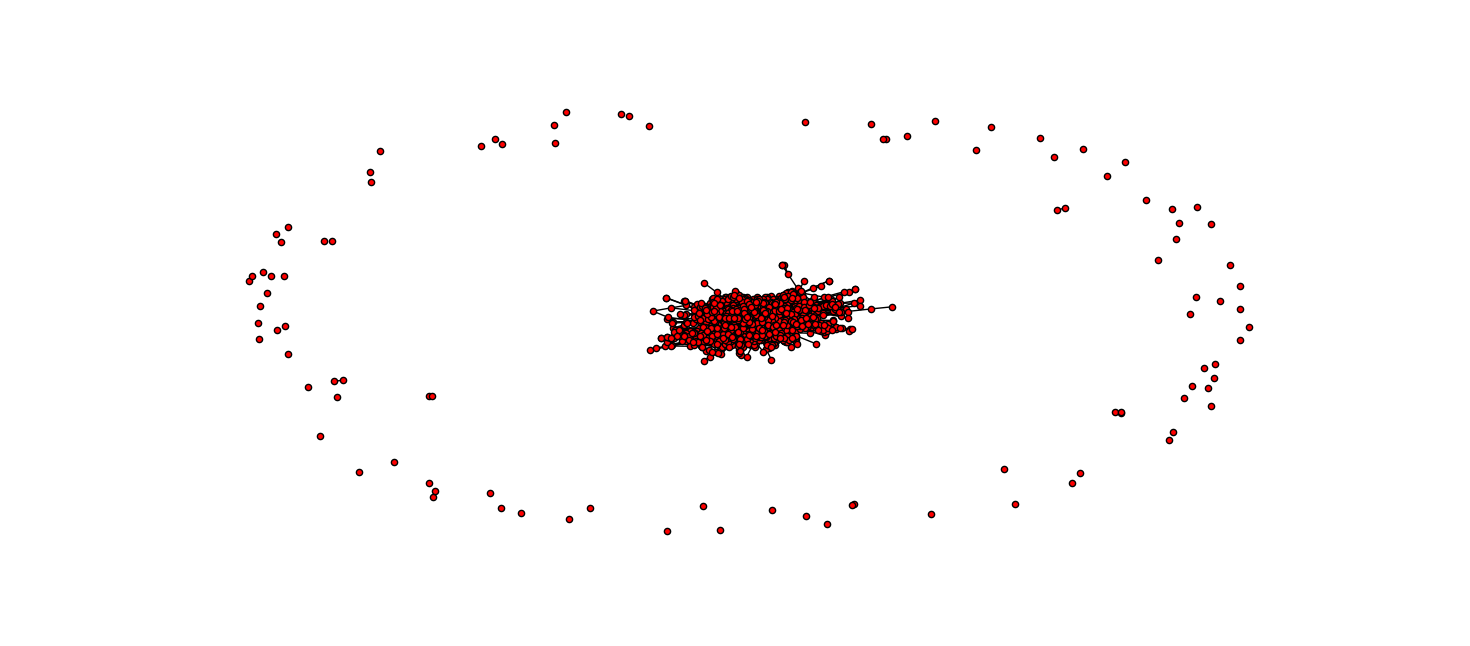

In [4]:
nx.draw(G,node_size=20)

In [5]:
btc = nx.betweenness_centrality(G)

sorted_btc = sorted(btc, key = btc.get,reverse = True)

for i in range(0,10):
    p = sorted_btc[i]
    print p,btc[p]

Transformers: Dark of the Moon (2011) 0.0286813125413
Independence Day (a.k.a. ID4) (1996) 0.0168576188579
Jack Ryan: Shadow Recruit (2014) 0.0156129640604
Kingdom of Heaven (2005) 0.0127142625272
Doors, The (1991) 0.0123357975883
Bride & Prejudice (2004) 0.0114437002187
Ready to Wear (Pret-A-Porter) (1994) 0.0111977107575
Saving Private Ryan (1998) 0.0102939781406
Bunraku (2010) 0.00976470147958
Tourist, The (2010) 0.0097227358781


In [6]:
eig = nx.eigenvector_centrality(G)
sorted_eig = sorted(eig, key = eig.get,reverse = True)

for i in range(0,10):
    p = sorted_eig[i]
    print p,eig[p]

Transformers: Dark of the Moon (2011) 0.160432725626
Independence Day (a.k.a. ID4) (1996) 0.150369288631
Doors, The (1991) 0.10448627154
Thirteen Days (2000) 0.101975048154
EDtv (1999) 0.100585193145
Casting By (2012) 0.0884953911489
He's Just Not That Into You (2009) 0.0812080633386
Cats & Dogs: The Revenge of Kitty Galore (2010) 0.0801132654675
Nixon (1995) 0.0775906121656
Dark Knight Rises, The (2012) 0.0733355704011


In [7]:
with open('films_dict.pickle', 'rb') as f:
    films_dict = cPickle.load(f)

In [8]:
ratings = []
btcs = []
count = 0
for title, attr in films_dict.iteritems():
    t = str(title)
    try: 
        btcs.append(btc[t])
        r = attr['rating']
        r = float(r)
        ratings.append(r)
    except:
        continue

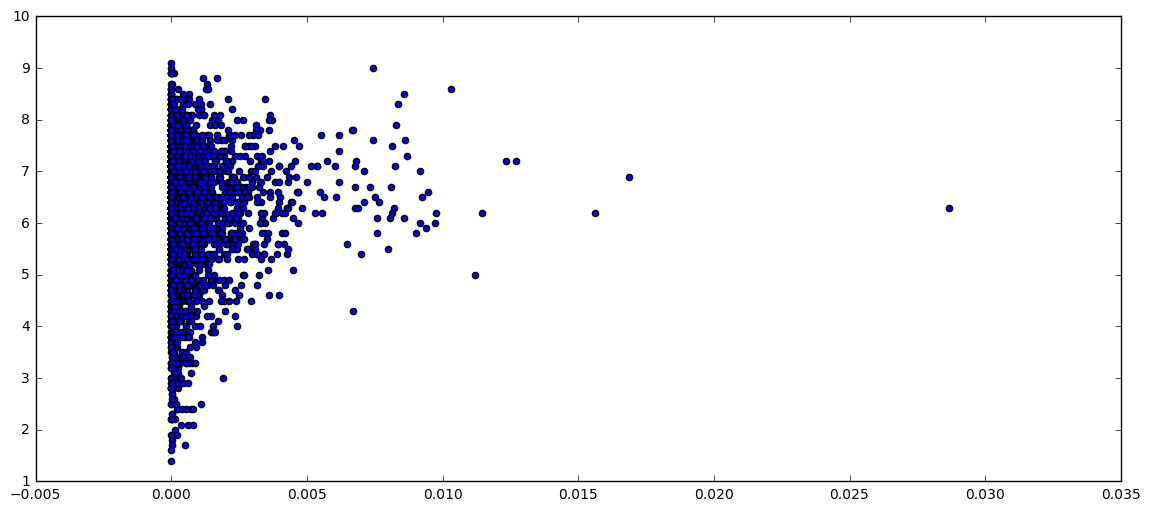

In [9]:
plt.scatter(btcs,ratings)
plt.show()

In [10]:
np.corrcoef(btcs,ratings)

array([[ 1.        ,  0.05691317],
       [ 0.05691317,  1.        ]])

In [11]:
giant = max(nx.connected_component_subgraphs(G), key=len)

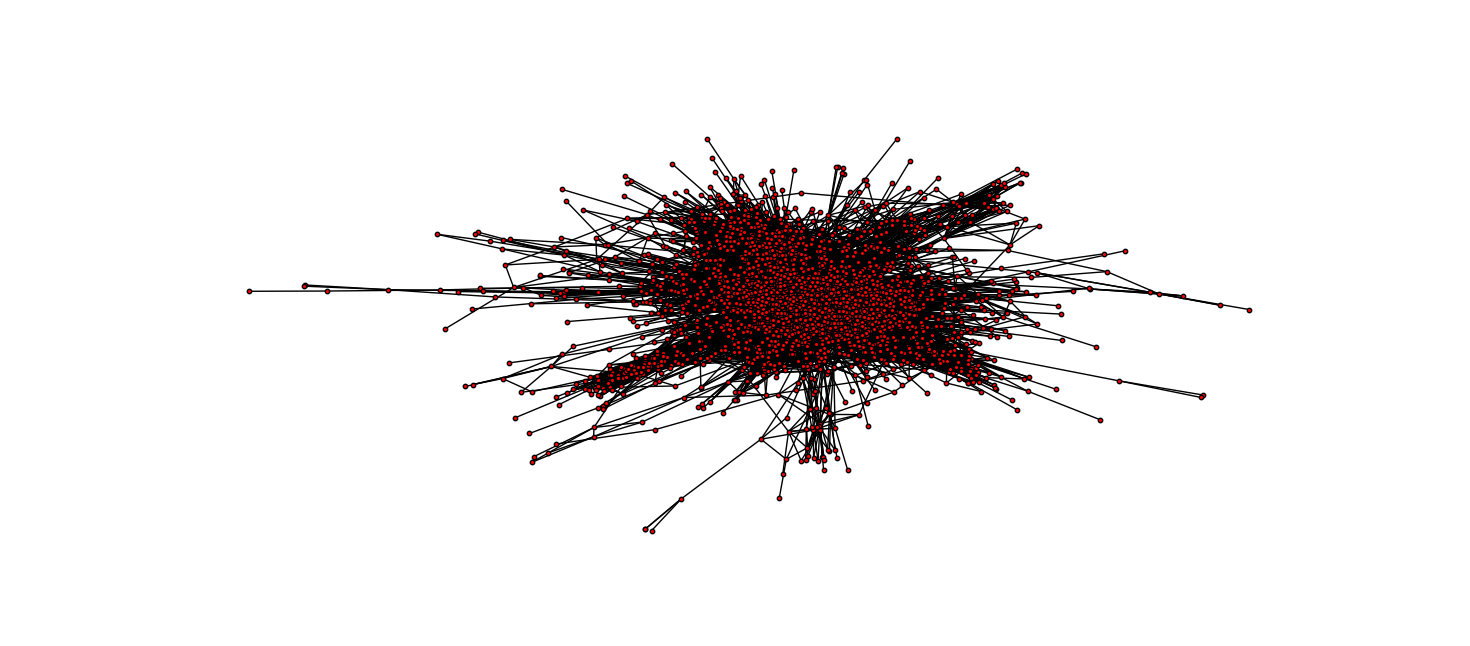

In [12]:
nx.draw(giant, node_size=10)

In [13]:
import community

In [14]:
partition = community.best_partition(giant)

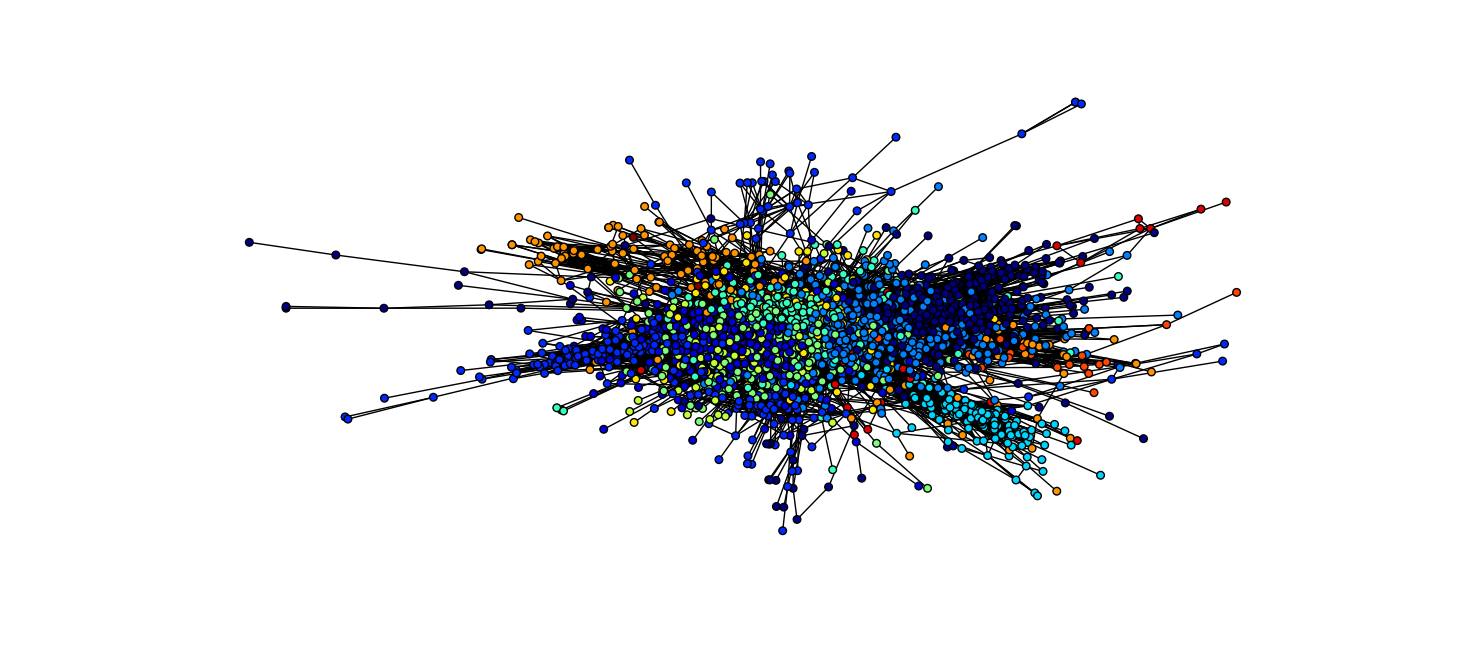

In [15]:
part = community.best_partition(giant)
mod = community.modularity(part,giant)

values = [part.get(node) for node in giant.nodes()]

fig_size = [18,14]

nx.draw_spring(giant, scale=3,cmap=plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False, linewidth = 0.2)
plt.show()

In [16]:
#Iterate through communities and count occurences of each genre in each community.
com_gen_dict = {}
gen_count = {}
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    gen_count = {}
    for n in list_nodes:
        for title, attr in films_dict.iteritems():        
            if n == title:
                genre = attr['genres'][0]
                genre = str(genre)
                if gen_count.get(genre) is None:
                    gen_count[genre] = 1
                else:
                    gen_count[genre] += 1 
    com_gen_dict[com] = gen_count

In [17]:
#Create a list of all unique genres
all_gens = []
for k,v in com_gen_dict.iteritems():
    for g in v.keys():
        all_gens.append(g)

        
all_gens = set(all_gens)
all_gens = list(all_gens)
all_gens = sorted(all_gens)

print len(all_gens)

20


In [18]:
import collections

ods = []
for k,v in com_gen_dict.iteritems():
    od = collections.OrderedDict(sorted(v.items()))
    ods.append(od.values())

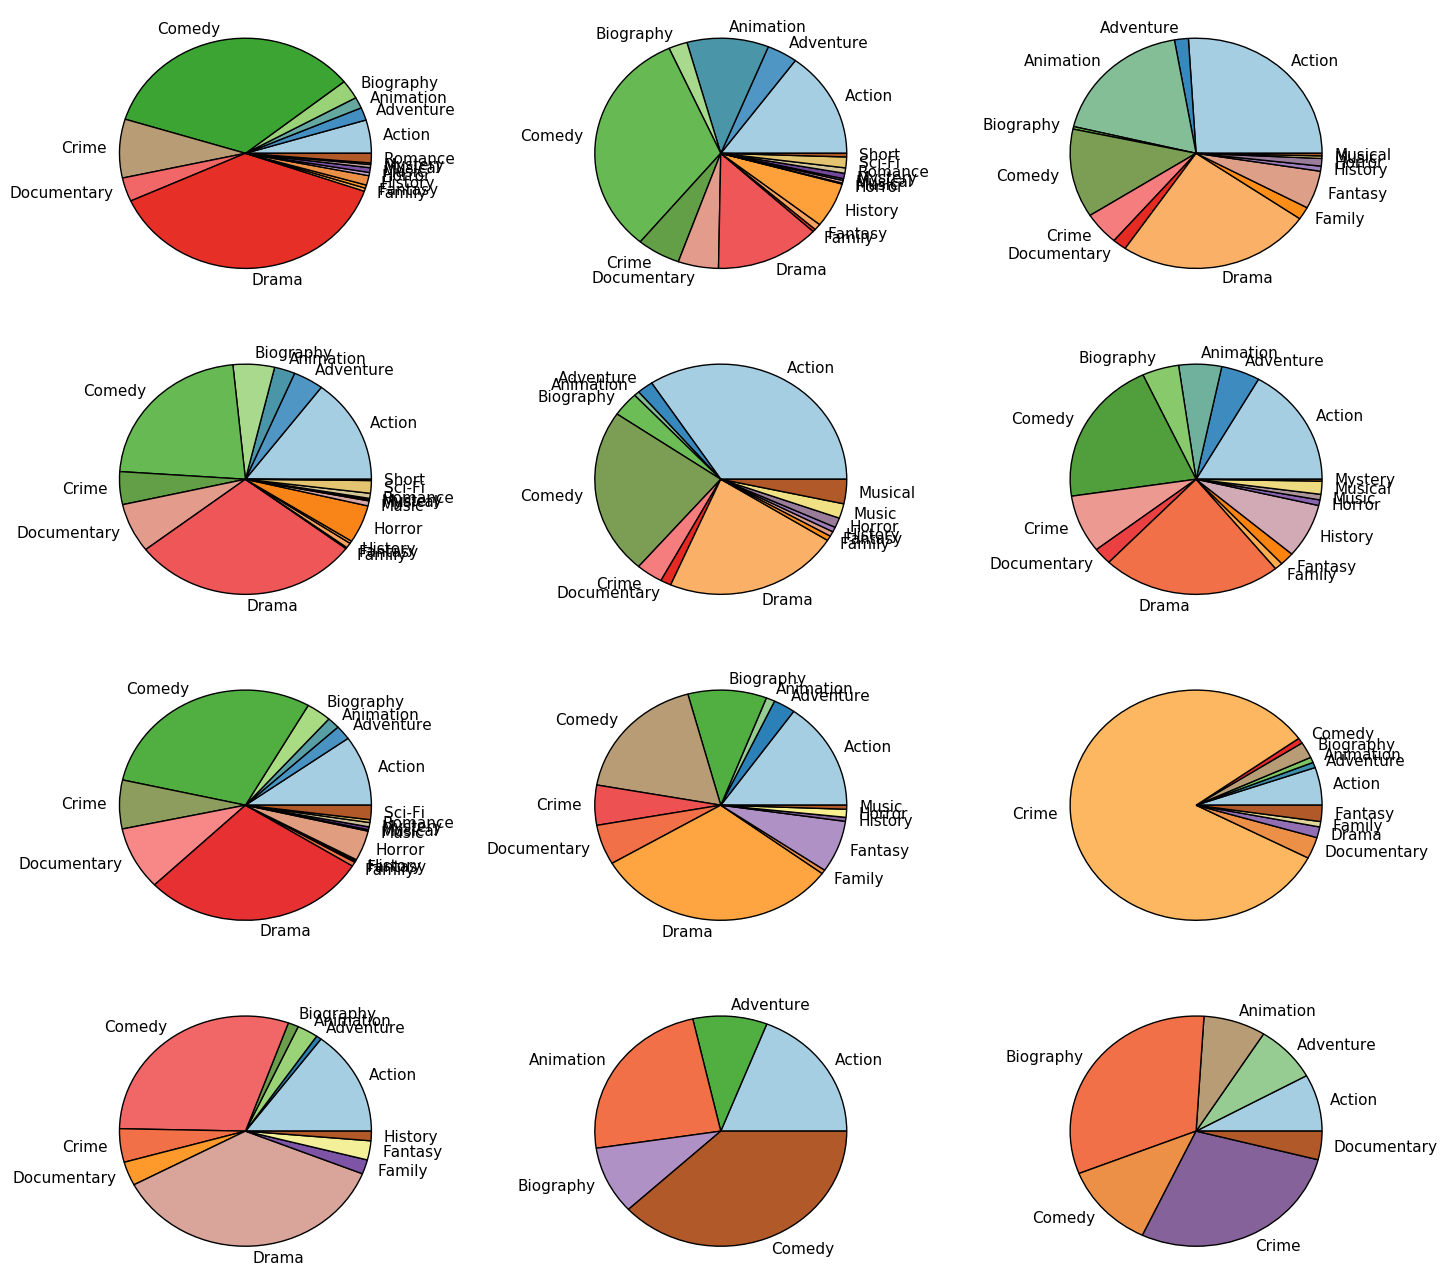

In [19]:
import matplotlib as mpl
import pandas as pd
mpl.rcParams['font.size'] = 11.0
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14,14))
dd = pd.DataFrame(ods[0],columns=[''])
dd.plot.pie(subplots=True, colormap='Paired', labels=all_gens,ax=axes[0,0],legend=False)

dd2 = pd.DataFrame(ods[1],columns=[''])
dd2.plot.pie(subplots=True, colormap='Paired', labels=all_gens,ax=axes[0,1],legend=False)

dd3 = pd.DataFrame(ods[2],columns=[''])
dd3.plot.pie(subplots=True, colormap='Paired', labels=all_gens,ax=axes[0,2],legend=False)

dd3 = pd.DataFrame(ods[3],columns=[''])
dd3.plot.pie(subplots=True, colormap='Paired', labels=all_gens,ax=axes[1,0],legend=False)

dd2 = pd.DataFrame(ods[4],columns=[''])
dd2.plot.pie(subplots=True, colormap='Paired', labels=all_gens,ax=axes[1,1],legend=False)

dd3 = pd.DataFrame(ods[5],columns=[''])
dd3.plot.pie(subplots=True, colormap='Paired', labels=all_gens,ax=axes[1,2],legend=False)

dd3 = pd.DataFrame(ods[6],columns=[''])
dd3.plot.pie(subplots=True, colormap='Paired', labels=all_gens,ax=axes[2,0],legend=False)

dd2 = pd.DataFrame(ods[7],columns=[''])
dd2.plot.pie(subplots=True, colormap='Paired', labels=all_gens,ax=axes[2,1],legend=False)

dd3 = pd.DataFrame(ods[8],columns=[''])
dd3.plot.pie(subplots=True, colormap='Paired', labels=all_gens,ax=axes[2,2],legend=False)

dd3 = pd.DataFrame(ods[9],columns=[''])
dd3.plot.pie(subplots=True, colormap='Paired', labels=all_gens,ax=axes[3,0],legend=False)

dd2 = pd.DataFrame(ods[10],columns=[''])
dd2.plot.pie(subplots=True, colormap='Paired', labels=all_gens,ax=axes[3,1],legend=False)

dd3 = pd.DataFrame(ods[11],columns=[''])
dd3.plot.pie(subplots=True, colormap='Paired', labels=all_gens,ax=axes[3,2],legend=False)

plt.tight_layout(pad=4.4,w_pad=10.5,h_pad=2.5)

**The outcome**

The result of this is plotted as pie charts and from this plot we clearly see that the genres are not really communities. The communities consist of many different genres and only one of the communities has a clear overweight of one genre, namely the one community which has more than 3/4 movies being documentary movies. So while we can't say that the genres are communities there are some specific genres, which differentiate a lot from other movie genres, that could be communities. Most actors fall in the category of being in a lot of different movie genres and some are primarily in e.g. documentaries. 

## Genres & words
**The idea:**

We want to see what the characteristic words for a movie and a genre of movies are. We would like to see whether this corresponds to what we would expect from a movie genre. 

**The tool**

For this we calculate TF-IDF which is the term frequency - inverse document frequency. This is the amount of occurrences of a word in one text multiplied with the inverse document frequency which gives lower scores to words frequently occurring in other texts as well. Thus the tf-idf is in indicator as to which words actually say something about a specific text giving high scores to the words that differentiates it from other texts. 
From these tf-idfs we make wordclouds which automatically correlates the tf-idf score of a word with the size of the word in the wordcloud.

**The Python code**

In [20]:
def clean(text):
    text = re.sub(r'\s*\<[\w\s\=\"\-\/]*\>', '', text) # All tags - i.e. <br/> <div> etc.
    text = text.replace('@','')
    text = text.replace('!','')
    text = text.replace('.','')
    text = text.replace(',','')
    text = text.replace('?','')
    text = text.replace('-','')
    text = text.replace('\n','')
    return text

In [21]:
with open('script_dict.pickle', 'rb') as fp:
       script_dict = pickle.load(fp)

In [22]:
text_tokens = {}
for title, script in script_dict.iteritems():
    text = str(script)
    text2 = clean(text)

    regex = r'\s*[^A-Za-z]+([a-z]+)'
    tokens = nltk.regexp_tokenize(text2, regex)
    
    sw2 = sw + ["you're", "don't", "i'm", "l'm", "i'll", "should've", ""] # adding extra stopwords
    tokens = [t.lower() for t in tokens if t.lower() not in sw2 and len(t) > 2]

    text_tokens[title] = tokens

### START TF-IDF

In [23]:
all_words = []
for t, v in text_tokens.items():
    for tt in v:
        all_words.append(tt)

all_words = set(all_words)

In [24]:
tfs_map = {}
for key, val in text_tokens.items():
    fd = nltk.FreqDist(val)
    tfs_map[key] = fd

In [25]:
idfs = {}
for t in all_words:
    occ = 0
    for w in script_dict.keys():
        tokens = text_tokens[w]
        if t in tokens:
            occ += 1

    idfs[t] = math.log(len(script_dict.keys())/float(occ+1))

In [26]:
tfds = {}
for title, wrds in tfs_map.iteritems():
    tfds[title] = {}
    for word in wrds:
        tfds[title][word] = tfs_map[title][word] * idfs[word]

In [27]:
films = {}
for k, array in tfds.items():
    
    one_string = ''
    for (word,score) in array.items():
        for ii in range(0,int(math.ceil(score))):
            one_string += word + ' '
            
    films[k] = one_string

In [28]:
genres = {}
for title in films.keys():
    genre = films_dict[title]['genres'][0]
    genres[genre] = []
        
for genre, movies in genres.iteritems():
    for title in films.keys():
        if genre == films_dict[title]['genres'][0]:
            movies.append(title)

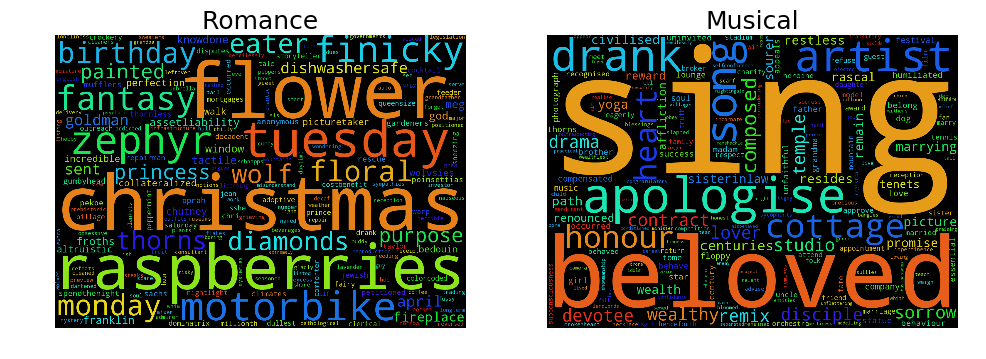

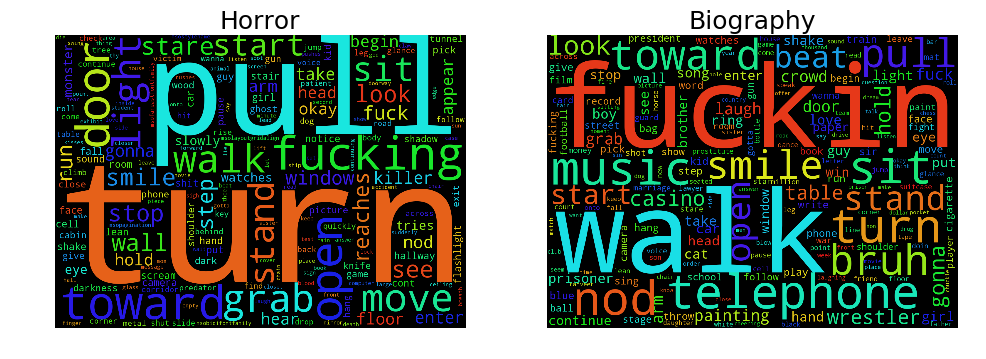

In [29]:
names = ['Romance','Musical','Horror','Biography']

for ii in  range(0,2):
    fig = plt.figure(figsize=(18,10))
    genre = names[ii*2]
    movies = genres[genre]
    string = ''
    for m in movies:
        try:
            string += films[m]
        except:
            continue        

    wordcloud = WordCloud(background_color = 'black',
                          width=1400,
                          height=1000).generate(string)

    plt.subplot2grid((3,3),(0,0), rowspan = 2)
    plt.imshow(wordcloud)
    plt.title(genre,fontsize=18)
    plt.axis('off')

    genre = names[ii + 1 + 1*ii]
    movies = genres[genre]
    string = ''
    for m in movies:
        try:
            string += films[m]
        except:
            continue        

    wordcloud = WordCloud(background_color = 'black',
                          width=1400,
                          height=1000).generate(string)

    plt.subplot2grid((3,3),(0,1), rowspan = 2)
    plt.imshow(wordcloud)
    plt.title(genre,fontsize=18)
    plt.axis('off')

    plt.show()

**Outcome**

For the genres we find that the wordclouds are actually very descriptive and emphasizes some of the words we ourselves would associate with a movie genre. E.g. For the musical genre words like sing, artist and beloved are some of the keywords - being the words with the highest tf-idf. Romance has flowers, Christmas, raspberries which you can easily associate with a romantic movie. The tf-idf is therefore quite informative and can give an indication as to whether the genre would be interesting for you to watch as you can check the keywords. But you can also use it for just one movie and thereby get a good understanding of the plot of the movie.


## Sentiment
**The idea:**

We want to find the happiness/negativeness of all the manuscripts we have downloaded. These sentiment scores will be stored in a dictionary with the name of the movies the keys and the scores as the values. We can then cross reference the titles to our dataset and get some insight on possible relations. We want to see if there is a correlation between a movie's sentiment in the script and the movie's IMDb rating, and do the same for actors and their sentiment.

**The tool**

The tool is the calculating the sentiment based on the LabMT wordlist(include reference). The LabMT wordlist is a list of 10,000 evaluated words in regards of happiness, where the 10,000 words are chosen solely on usage frequency.
So for each script we clean it by removing HTML tags, then we split it up in tokens and finally accumulate the total sentiment score.

**The Python code**

In [30]:
f = io.open('./labmt.txt', 'r', encoding='utf-8')

labmt = {}

titles = nltk.word_tokenize(f.readline())# To get the titles out

for line in f:
    #tokens = nltk.word_tokenize(line)
    tokens = line.split('\t')
    
    scores = {}
    scores[titles[2]] = tokens[2]

    labmt[tokens[0]] = scores

In [31]:
def removeTags(text):
    text = re.sub(r'\s*\<[\w\s\=\"\-\/]*\>', '', text) # All tags - i.e. <br/> <div> etc.
    return text

def sentiment_score(text):
    result = 0.0
    text = removeTags(text)
    tokens = text.split(' ')
    tokens = [t.lower() for t in tokens]
    for w in tokens:
        if w in labmt.keys() and w.isalpha():
            data = labmt[w]['happiness_average']
            if data != '--' and data != 't':
                result += float(data)
    
    return result

In [32]:
movie_rating = []
for k,v in films_dict.iteritems():
    movie_rating.append( (k,v['rating']) )

In [33]:
sorted_rating = sorted(movie_rating, key=lambda tup: tup[1], reverse=True)
top_scripts = []
for title, script in script_dict.iteritems():
    for (t,r) in sorted_rating:
        if title == t:
            top_scripts.append( (title,r) )

In [34]:
with open('senti_script.pickle', 'rb') as fp:
       senti_script = pickle.load(fp)

In [35]:
for (t,r) in top_scripts:
    if t not in senti_script.keys():
        senti_score = sentiment_score(script_dict.get(t))
        senti_script[t] = {'score': senti_score, 'rating': r}

## Correlate sentiment vs. IMDb rating

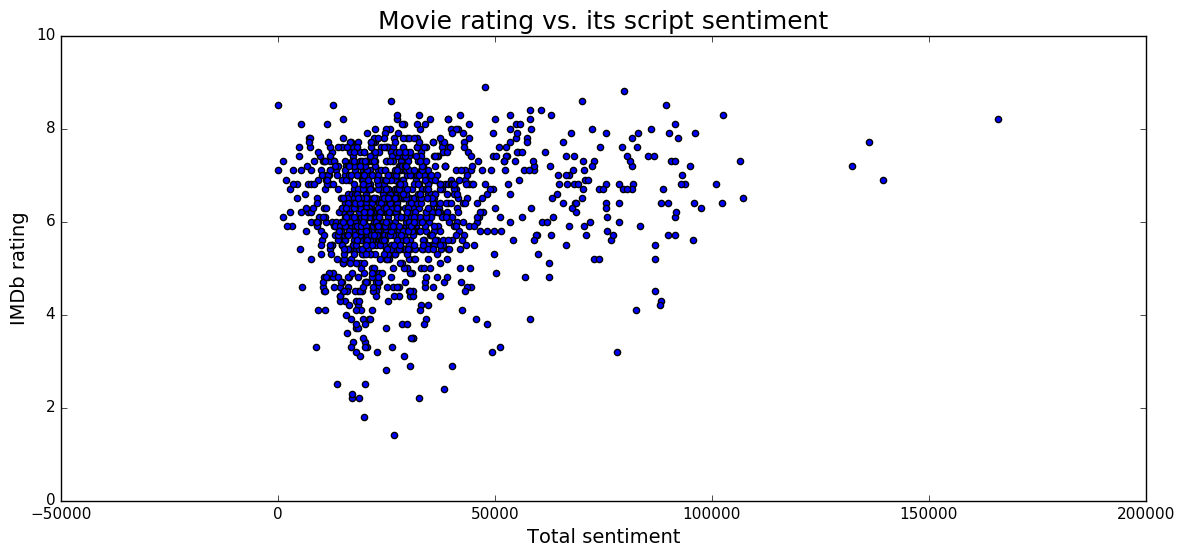

In [36]:
scores = []
ratings = []

for k,v in senti_script.iteritems():
    scores.append(v['score'])
    ratings.append(v['rating'])
    
plt.scatter(scores,ratings)
plt.ylim(0,10)
plt.title('Movie rating vs. its script sentiment', fontsize=18)
plt.ylabel('IMDb rating', fontsize=14)
plt.xlabel('Total sentiment', fontsize=14)
plt.show()

## Sentiment for actors

In [37]:
actor_movies = defaultdict(list)
for title, attr in films_dict.iteritems():
    for t in senti_script.keys():
        if title == t:
            for a in attr['cast']:
                actor_movies[a].append(title)

In [38]:
actor_senti = defaultdict(list)
for a, mvs in actor_movies.iteritems():
    for t, vls in senti_script.iteritems():
        if t in mvs:
            actor_senti[a].append(vls['score'])

In [39]:
average_actor_senti = defaultdict(list)
for a, r in actor_senti.iteritems():
    if len(r) > 5:
        average_actor_senti[a] = np.average(r)

In [40]:
bottm10 = sorted(average_actor_senti.items(), key=operator.itemgetter(1))[:10]
top10 = sorted(average_actor_senti.items(), key=operator.itemgetter(1), reverse=True)[:10]

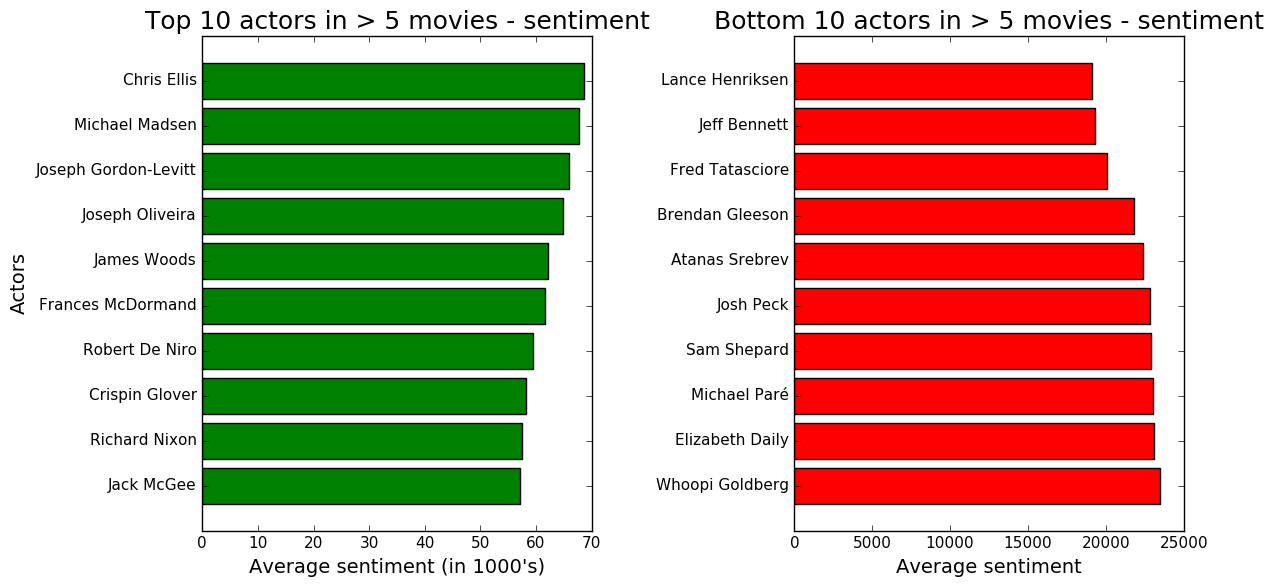

In [41]:
fig = plt.figure(figsize=(18,6))

# Top
names = [n for (n,v) in top10]
rating = [v/1000 for (n,v) in top10]
acts = np.arange(len(names))
acts = sorted(acts, reverse=True)


plt.subplot2grid((2,3),(0,0), rowspan = 2)
plt.barh(acts, rating, align='center', color='g')
plt.yticks(acts, names)
plt.ylim(-1,len(names))
plt.title("Top 10 actors in > 5 movies - sentiment", fontsize = 18)
plt.ylabel("Actors", fontsize = 14)
plt.xlabel("Average sentiment (in 1000's)", fontsize=14)

# Bottom
names2 = [n for (n,v) in bottm10]
rating2 = [v for (n,v) in bottm10]
acts2 = np.arange(len(names2))
acts2 = sorted(acts2, reverse=True)

plt.subplot2grid((2,3),(0,1), rowspan = 2)
plt.barh(acts2, rating2, align='center', color='r')
plt.yticks(acts2, names2)
plt.ylim(-1,len(names))
plt.title("Bottom 10 actors in > 5 movies - sentiment", fontsize = 18)
plt.xlabel("Average sentiment", fontsize=14)

plt.tight_layout()

## Correlate actor sentiment with IMDb rating

In [42]:
with open('film_money_dict.pickle', 'rb') as fp:
       films_dict2 = pickle.load(fp)

In [38]:
actor_scores = defaultdict(list)
for title, attr in films_dict.iteritems():
    for a in attr['cast']:
        actor_scores[a].append(attr['imdb_score'])

In [44]:
actor_sent_score = {}
for a in actor_senti.keys():
    actor_sent_score[a] = {'rating': actor_scores.get(a), 'senti': actor_senti.get(a)}

In [45]:
sents = []
ratings = []
for k, v in actor_sent_score.iteritems():
    if len(v['senti']) > 5: 
        sents.append(np.average(v['senti']))
        ratings.append(np.average(v['rating']))

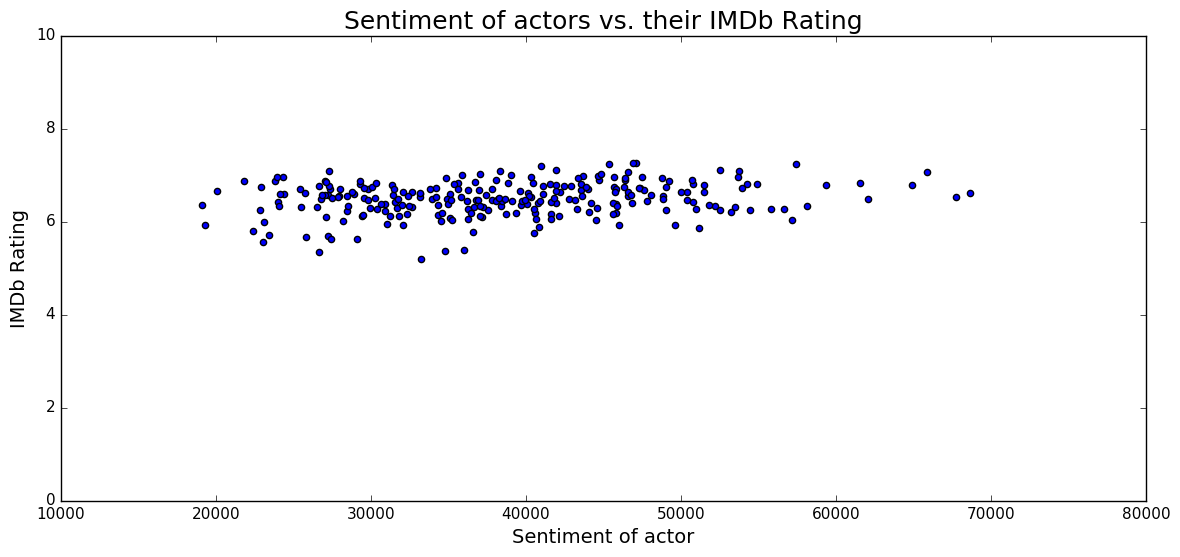

In [46]:
plt.scatter(sents,ratings)
plt.ylim(0,10)
plt.title('Sentiment of actors vs. their IMDb Rating', fontsize = 18)
plt.ylabel('IMDb Rating', fontsize = 14)
plt.xlabel('Sentiment of actor', fontsize = 14)
plt.show()

**Outcome**

The result is a few plots to show relation between scripts' sentiment and IMDb for movies and actors respectivley.
Unfortunately it doesn't uncover some surprising relations, but more whats expected - that the happiness doesn't necessarily determine the IMDb rating of movies or actors.

## General Data & Correlations
**The idea:**
The idea is that we want to look at different attributes from our data set and present them to the users. For example we want to list the 10 best and 10 worst actors, as it might provide the users with some new knowledge.

We also want to set different attributes up against each other to see if there are some sort of patterns that the user might find interesting. 

**The tool**
General python structures, mostly dictionaries and lists. Dictionaries are preferred over lists in this case as the running time will be increased significantly if lists are used.

**Python Code**


## Actors and ratings

In [47]:
average_actor_rating = {}
for (a,r) in actor_scores.items():
    if len(r) > 10:
        average_actor_rating[a] = np.average(r)

In [48]:
bottm10 = sorted(average_actor_rating.items(), key=operator.itemgetter(1))[:10]
top10 = sorted(average_actor_rating.items(), key=operator.itemgetter(1), reverse=True)[:10]

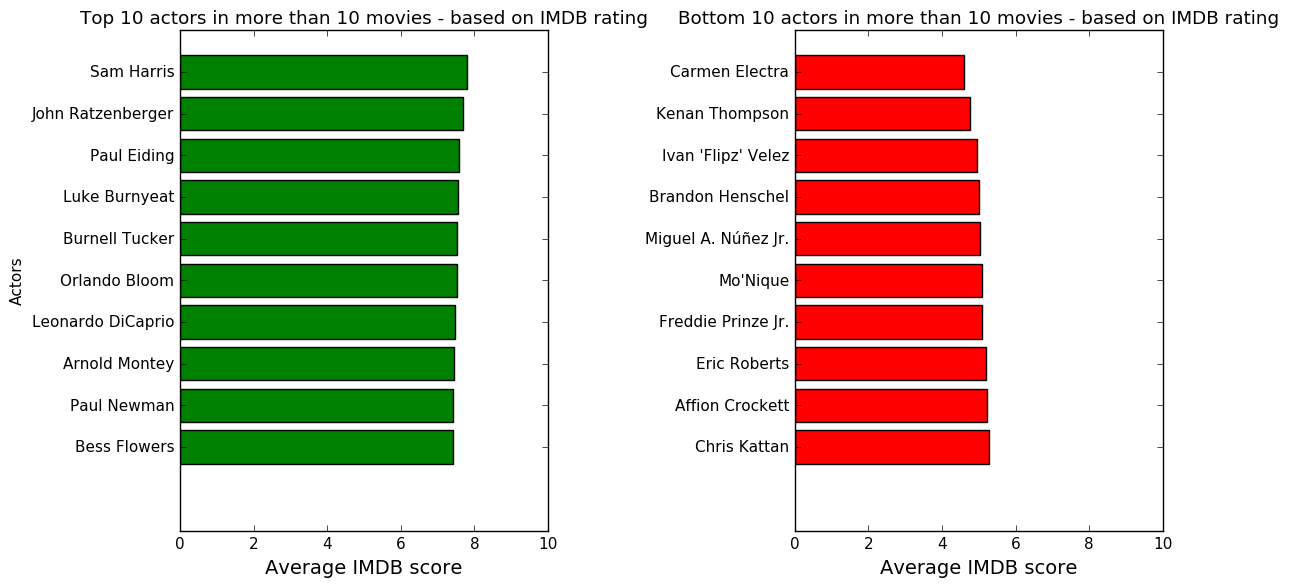

In [49]:
fig = plt.figure(figsize=(18,6))

# Top
names = [n for (n,v) in top10]
rating = [v for (n,v) in top10]
acts = np.arange(len(names))
acts = sorted(acts, reverse=True)

plt.subplot2grid((2,3),(0,0), rowspan = 2)
plt.barh(acts, rating, align='center', color='g')
plt.xlim(0,10)
plt.yticks(acts, names)
plt.title("Top 10 actors in more than 10 movies - based on IMDB rating")
plt.ylabel("Actors")
plt.xlabel("Average IMDB score", fontsize=14)

# Bottom
names2 = [n for (n,v) in bottm10]
rating2 = [v for (n,v) in bottm10]
acts2 = np.arange(len(names2))
acts2 = sorted(acts2, reverse=True)

plt.subplot2grid((2,3),(0,1), rowspan = 2)
plt.barh(acts2, rating2, align='center', color='r')
plt.xlim(0,10)
plt.yticks(acts2, names2)
plt.title("Bottom 10 actors in more than 10 movies - based on IMDB rating")
plt.xlabel("Average IMDB score", fontsize=14)

plt.tight_layout()

## Genres and ratings/gross

In [23]:
with open('film_money_dict.pickle','rb') as f:
    films_dict = cPickle.load(f)

In [24]:
all_genres = []
for title, attr in films_dict.iteritems():
    for g in attr['genres']:
        all_genres.append(g)
        
all_genres = set(all_genres)
all_genres = list(all_genres)

In [26]:
genre_scores = defaultdict(list)
for title, attr in films_dict.iteritems():
    for g in all_genres:
        if g in attr['genres']:
            genre_scores[g].append(attr['imdb_score'])

average_genre_rating = {}
for (g,r) in genre_scores.items():
    average_genre_rating[g] = np.average(r)
    
sorted_genres = sorted(average_genre_rating.items(), key=operator.itemgetter(1), reverse=True)

In [27]:
genre_gross = defaultdict(list)
for title, attr in films_dict.iteritems():
    for g in all_genres:
        if g in attr['genres']:
            gross = attr['gross']
            if str(gross) != 'nan':
                genre_gross[g].append(float(attr['gross']))

average_gross_rating = {}
for (g,r) in genre_gross.items():
    average_gross_rating[g] = np.average(r)
    
sorted_gross = sorted(average_gross_rating.items(), key=operator.itemgetter(1), reverse=True)

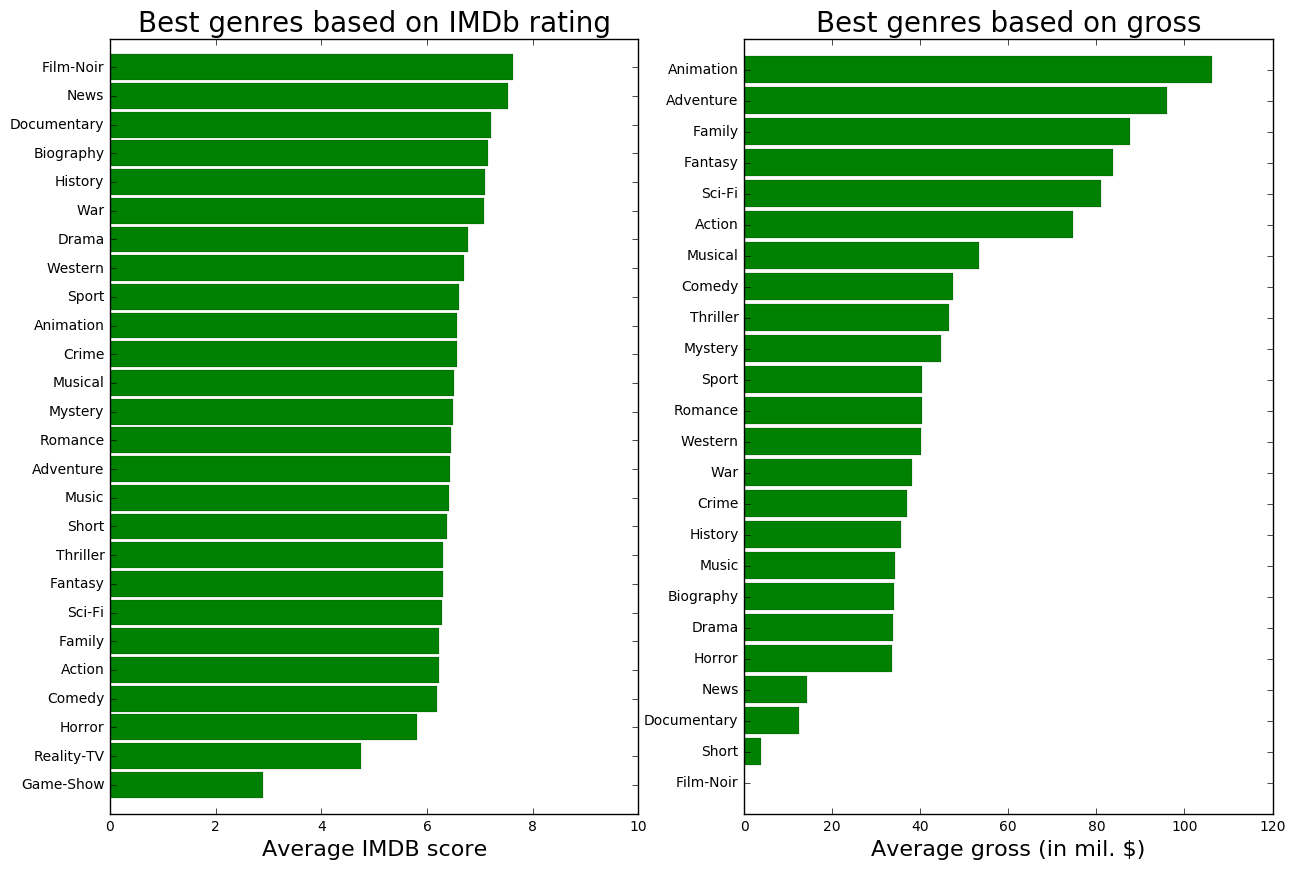

In [28]:
fig = plt.figure(figsize=(15,10))

names = [n for (n,v) in sorted_genres]
rating = [v for (n,v) in sorted_genres]
acts = np.arange(len(names))
acts = sorted(acts, reverse=True)

plt.subplot2grid((1,2),(0,0), rowspan = 2)
plt.barh(acts, rating, height=0.9, linewidth=0.1, align='center', color='g')
plt.xlim(0,10)
plt.ylim(-1, len(names))
plt.yticks(acts, names)
plt.title("Best genres based on IMDb rating", fontsize=20)
plt.xlabel("Average IMDB score", fontsize=16)


names = [n for (n,v) in sorted_gross]
gross = [(v/1000000) for (n,v) in sorted_gross] # Reduce gross number
acts = np.arange(len(names))
acts = sorted(acts, reverse=True)

plt.subplot2grid((1,2),(0,1), rowspan = 2)
plt.barh(acts, gross, height=0.9, linewidth=0.1, align='center', color='g')
plt.ylim(-1, len(names))
plt.yticks(acts, names)
plt.title("Best genres based on gross", fontsize=20)
plt.xlabel("Average gross (in mil. $)", fontsize=16)
plt.show()

In [29]:
ratings = []
gross = [] 
sort_g_r = []
for n,v in sorted_genres:
    for n2,v2 in sorted_gross:
        if n == n2:
            sort_g_r.append((v,(v2/1000000)))
            
sort_g_r = sorted(sort_g_r, key=lambda x: x[0],reverse=True)
ratings = [n for (n,v) in sort_g_r]
gross = [v for (n,v) in sort_g_r]

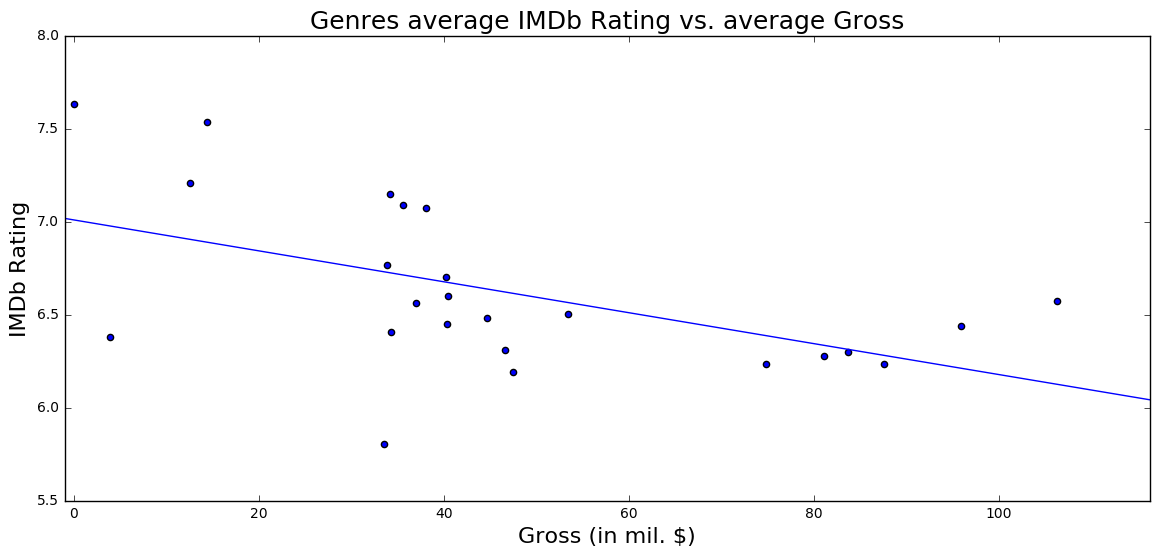

In [30]:
plt.scatter(gross,ratings)
axes = plt.gca()
m, b = np.polyfit(gross, ratings, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-')
plt.xlabel('Gross (in mil. $)', fontsize=16)
plt.ylabel('IMDb Rating', fontsize=16)
plt.title('Genres average IMDb Rating vs. average Gross', fontsize=18)
plt.xlim(-1,max(gross)+10)
plt.show()

## Directors

In [31]:
all_dirs = []

for t, attr in films_dict.iteritems():
    if str(attr['director']) != 'nan':
        all_dirs.append(attr['director'])

In [32]:
dir_rating = defaultdict(list)
for d in all_dirs:
    for t, attr in films_dict.iteritems():
        if d == attr['director']:
            dir_rating[d].append(attr['imdb_score'])

In [33]:
avg_dir_rating = defaultdict(list)
for k,v in dir_rating.iteritems():
    if len(v) > 5:
        avg_dir_rating[k] = np.average(v)

In [34]:
bottm10 = sorted(avg_dir_rating.items(), key=operator.itemgetter(1))[:10]
top10 = sorted(avg_dir_rating.items(), key=operator.itemgetter(1), reverse=True)[:10]

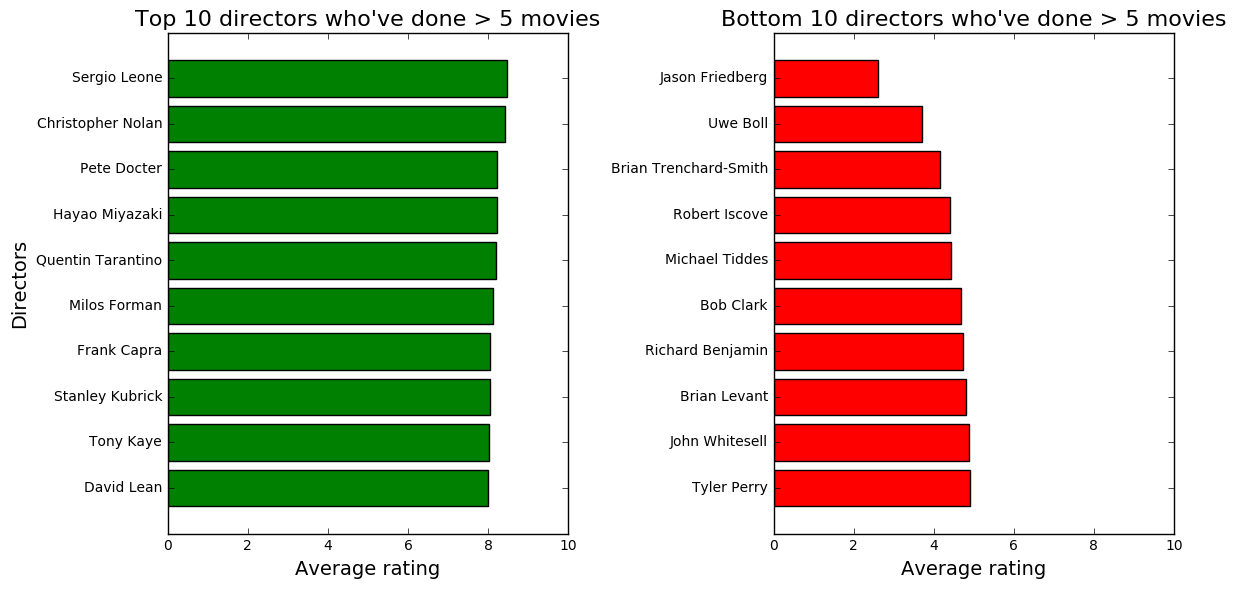

In [35]:
fig = plt.figure(figsize=(18,6))

names = [urllib.unquote(n).decode('utf-8') for (n,v) in top10]
rating = [v for (n,v) in top10]
acts = np.arange(len(names))
acts = sorted(acts, reverse=True)

plt.subplot2grid((2,3),(0,0), rowspan = 2)
plt.barh(acts, rating, align='center', color='g')
plt.yticks(acts, names)
plt.xlim(0,10)
plt.ylim(-1,len(names))
plt.title("Top 10 directors who've done > 5 movies", fontsize=16)
plt.ylabel("Directors", fontsize=14)
plt.xlabel("Average rating", fontsize=14)


names = [urllib.unquote(n).decode('utf-8') for (n,v) in bottm10]
rating = [v for (n,v) in bottm10]
acts = np.arange(len(names))
acts = sorted(acts, reverse=True)

plt.subplot2grid((2,3),(0,1), rowspan = 2)
plt.barh(acts, rating, align='center', color='r')
plt.yticks(acts, names)
plt.xlim(0,10)
plt.ylim(-1,len(names))
plt.title("Bottom 10 directors who've done > 5 movies", fontsize=16)
plt.xlabel("Average rating", fontsize=14)

plt.tight_layout()
plt.show()

## Directors and their actors

In [36]:
dirs_acts = {}
for d in all_dirs:
    act_c = defaultdict(int)
    for t, attr in films_dict.iteritems():
        if d == attr['director']:
            for a in attr['cast']:
                act_c[a] += 1
    dirs_acts[d] = act_c

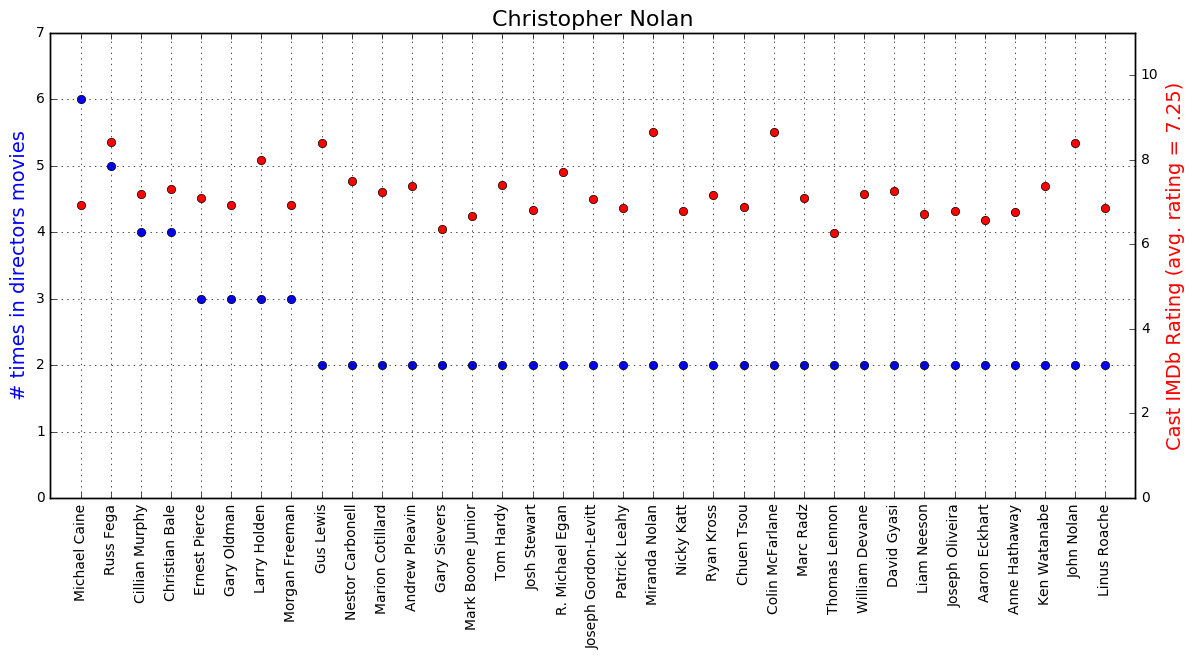

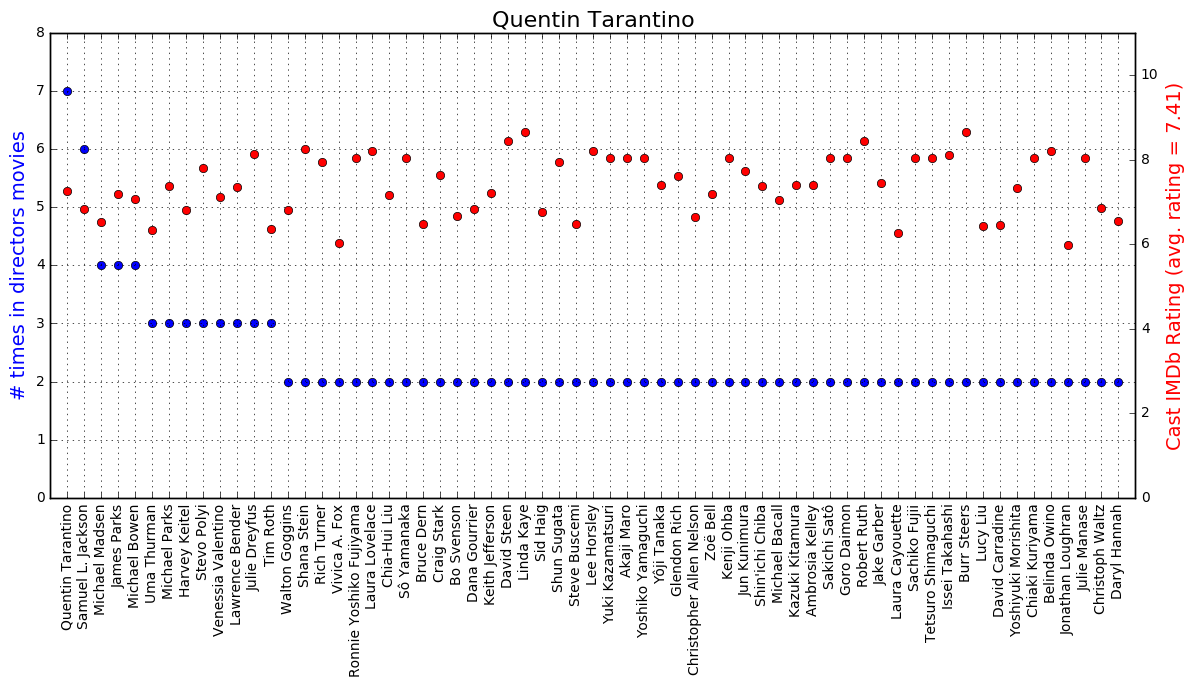

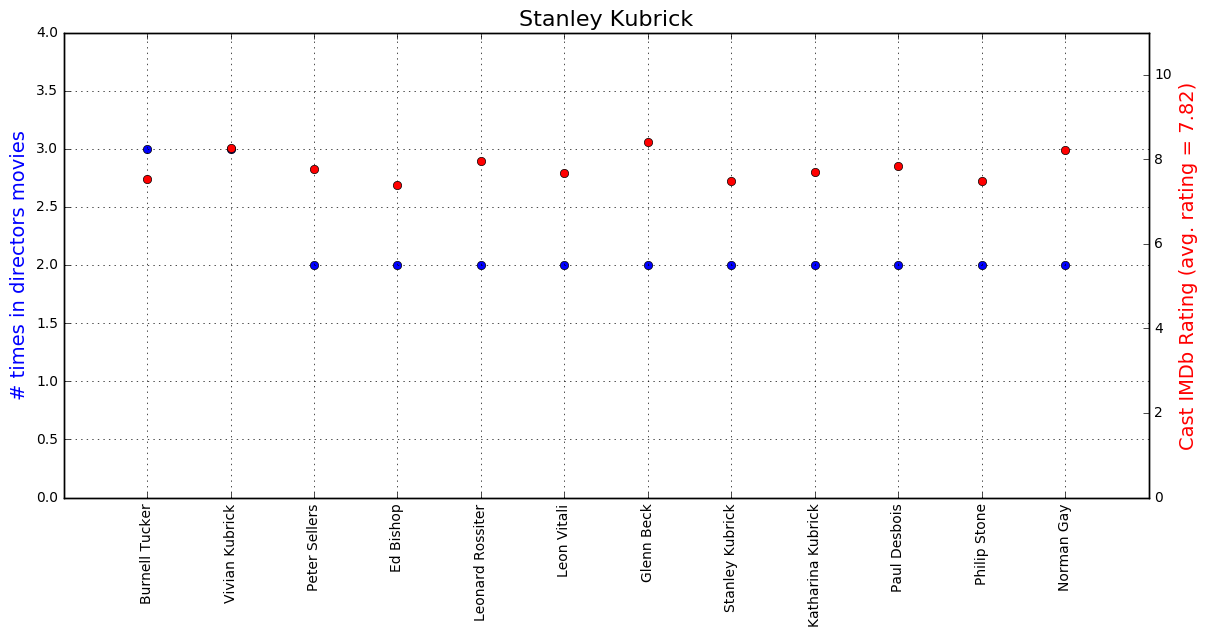

In [39]:
names_top = ['Christopher Nolan', 'Quentin Tarantino', 'Stanley Kubrick']

for ii in range(0,3):
    vals = sorted(dirs_acts.get(names_top[ii]).items(), key=operator.itemgetter(1))

    names = [n for (n,v) in vals if v > 1]
    rating = [v for (n,v) in vals if v > 1]
    
    d = {}
    for n in names:
        d[n] = actor_scores.get(n)
        
    actor_r = [np.average(v) for n in names for (n1,v) in d.items() if n == n1]

    fig, ax1 = plt.subplots()

    acts = np.arange(len(actor_r))
    acts = sorted(acts, reverse=True)
    ax2 = ax1.twinx()
    ax2.set_ylim(0,11)
    ax2.plot(acts,actor_r, 'ro')
    ax2.set_ylabel('Cast IMDb Rating (avg. rating = %.2f)' % np.average(actor_r), color='r', fontsize=14)

    acts = np.arange(len(names))
    acts = sorted(acts, reverse=True)
    ax1.plot(acts, rating, 'bo')
    ax1.set_ylim(0,max(rating)+1)
    ax1.set_xlim(-1,len(names))
    ax1.set_xticks(acts)
    ax1.set_xticklabels(names, rotation=90)
    ax1.set_ylabel('# times in directors movies', color='b', fontsize=14)
    ax1.grid()
    plt.title(names_top[ii], fontsize=16)
    plt.show()

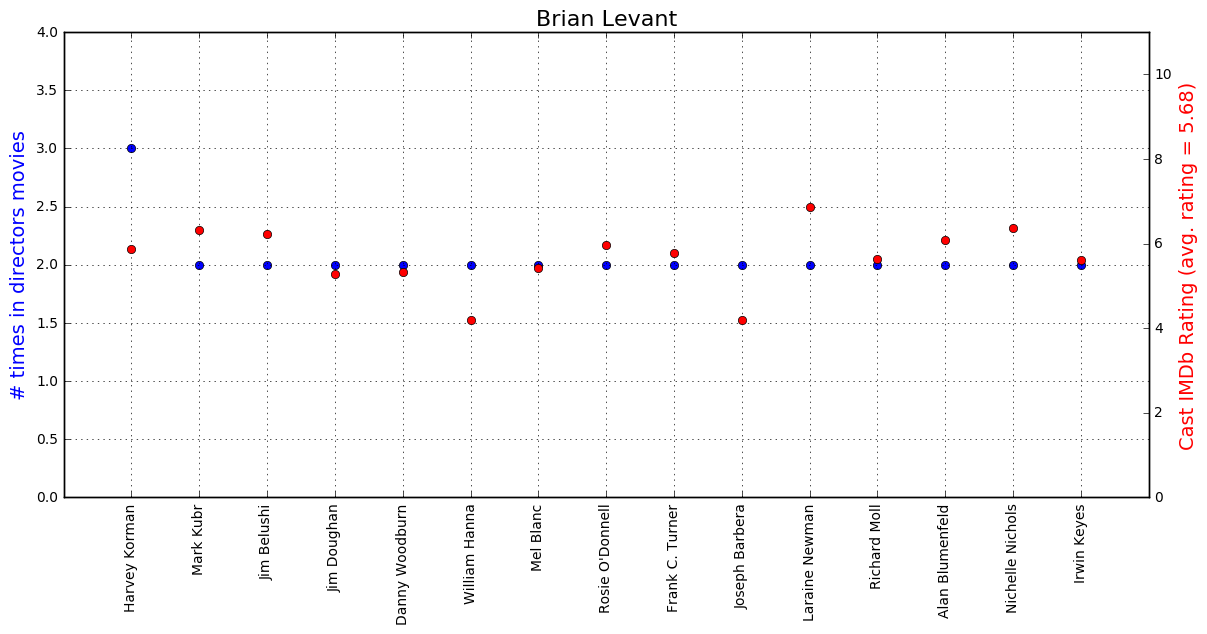

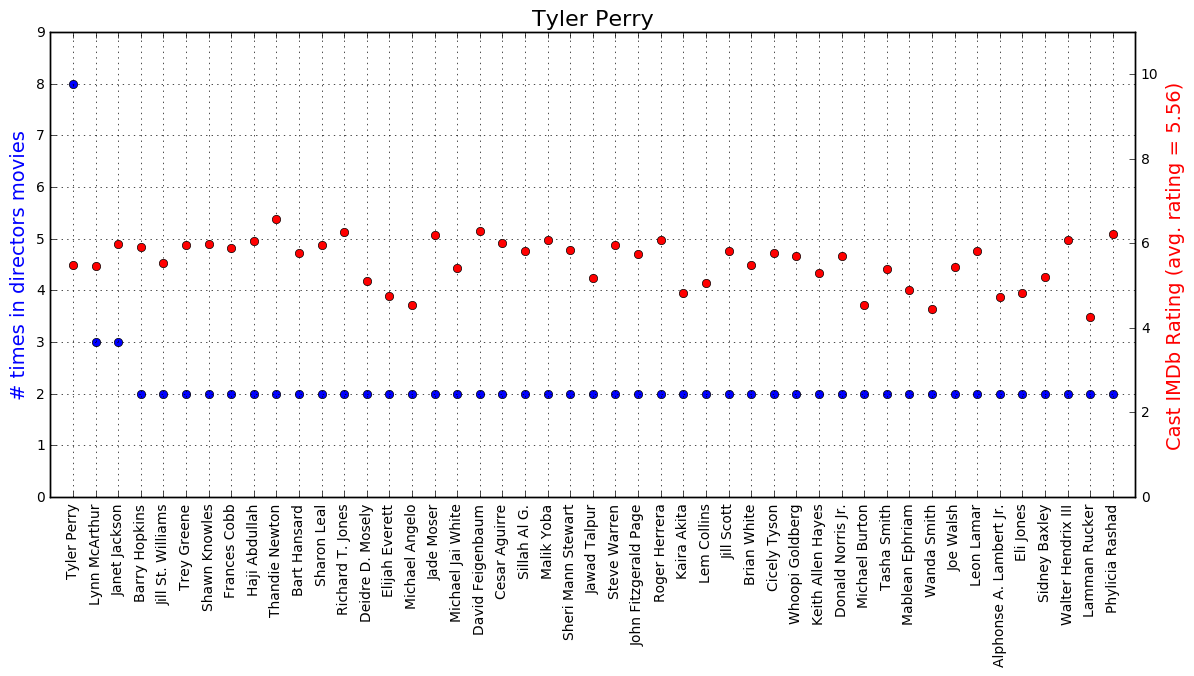

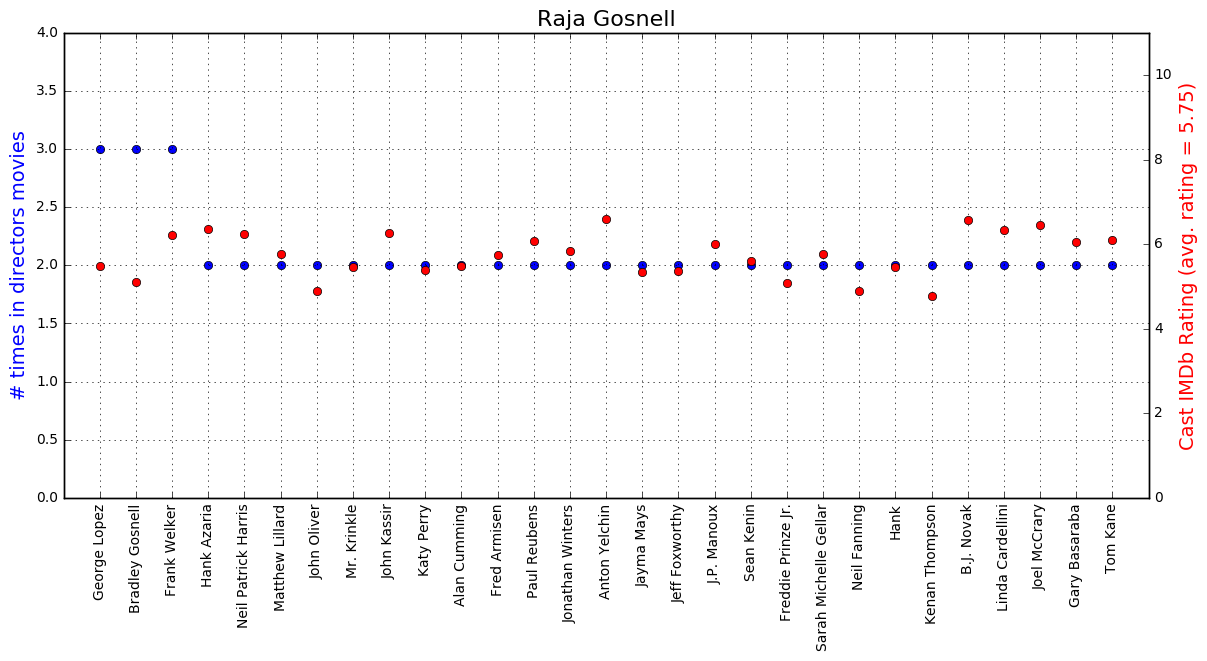

In [40]:
names_top = ['Brian Levant', 'Tyler Perry', 'Raja Gosnell']

for ii in range(0,3):
    vals = sorted(dirs_acts.get(names_top[ii]).items(), key=operator.itemgetter(1))

    names = [n for (n,v) in vals if v > 1]
    rating = [v for (n,v) in vals if v > 1]
    
    d = {}
    for n in names:
        d[n] = actor_scores.get(n)
        
    actor_r = [np.average(v) for n in names for (n1,v) in d.items() if n == n1]

    fig, ax1 = plt.subplots()

    acts = np.arange(len(actor_r))
    acts = sorted(acts, reverse=True)
    ax2 = ax1.twinx()
    ax2.set_ylim(0,11)
    ax2.plot(acts,actor_r, 'ro')
    ax2.set_ylabel('Cast IMDb Rating (avg. rating = %.2f)' % np.average(actor_r), color='r', fontsize=14)

    acts = np.arange(len(names))
    acts = sorted(acts, reverse=True)
    ax1.plot(acts, rating, 'bo')
    ax1.set_ylim(0,max(rating)+1)
    ax1.set_xlim(-1,len(names))
    ax1.set_xticks(acts)
    ax1.set_xticklabels(names, rotation=90)
    ax1.set_ylabel('# times in directors movies', color='b', fontsize=14)
    plt.title(names_top[ii], fontsize=16)
    ax1.grid()
    plt.show()

In [41]:
dir_r_act_r = {}
for dirc in all_dirs:
    vals = sorted(dirs_acts.get(dirc).items(), key=operator.itemgetter(1))

    names = [n for (n,v) in vals if v > 1]
    occurs = [v for (n,v) in vals if v > 1]

    d = {}
    for n in names:
        d[n] = actor_scores.get(n)

    for n in names:
        for (n1,v) in d.items():
            if n == n1:
                dir_r_act_r[dirc] = {'dir_r': np.average(dir_rating.get(dirc)), 'act_r': np.average(v)}
    
#print len(dir_r_act_r.keys())

## Correlate director rating vs. cast rating

In [42]:
drs = []
ars = []
for k, v in dir_r_act_r.iteritems():
    drs.append(v['dir_r'])
    ars.append(v['act_r'])

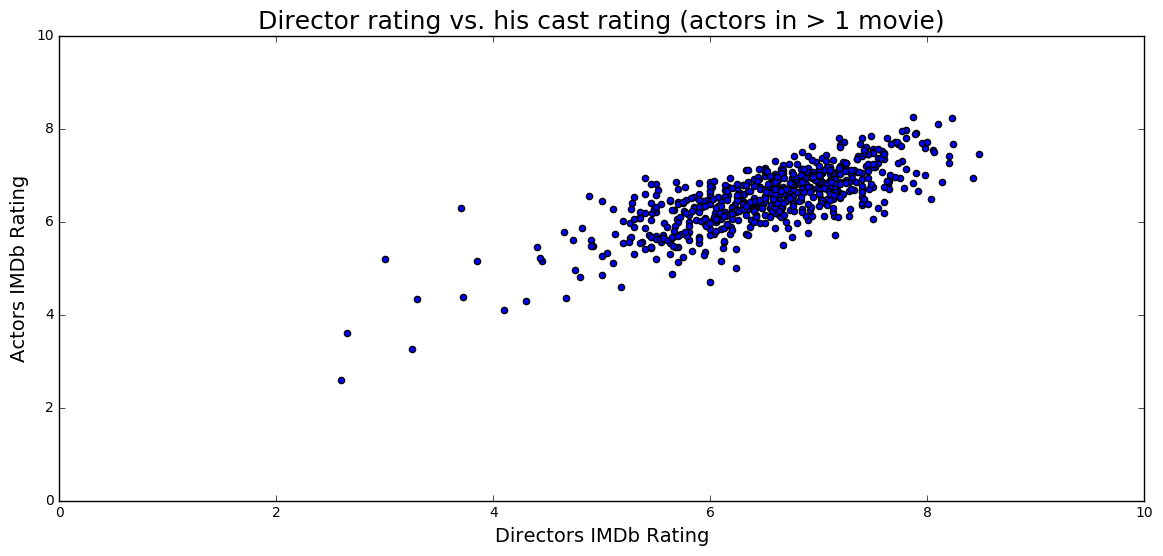

In [43]:
plt.scatter(drs,ars)
plt.xlim(0,10)
plt.ylim(0,10)
plt.title('Director rating vs. his cast rating (actors in > 1 movie)', fontsize=18)
plt.ylabel('Actors IMDb Rating', fontsize=14)
plt.xlabel('Directors IMDb Rating', fontsize=14)
plt.show()

**Outcome**

The outcome is quite a few plots and graphs which gives some insight into the dataset and maybe provides the user with some information they didn't have.

# Discussion. Think critically about your creation
### What went well?
We managed to get a pretty good dataset and got some nice insights into its relationships. We may not have discovered some groundbreaking patterns in moviemaking, but we did perform the analysis as we wanted and got some information we didn't have before.

### What is still missing? What could be improved?, Why?
**Dataset**

We found that the 'gross' specified in the Kaggle dataset is actually domestic gross and not worldwide gross. This does give our analysis a sort of skewed output. Also the budget could've been better formatted, so that all budgets are of the same currency, for example USD. 

**Sentiment**

When calculating the sentiment for each actor we merely averaged the sentiment of all the movies the actor was in. It would be interesting if we could have the specific lines for each actor available so that the sentiment is calculated for each role instead.